In [1]:
import sys
PYTHON = %system which python
HOSTNAME = %system echo $HOSTNAME
print("python dir:     ",PYTHON)
print("HOSTNAME:       ",HOSTNAME)

sys.path.append('/home/leila/gpcr/ga/analysis/_PLOT')
sys.path.append('/home/leila/gpcr/ga/analysis/_corr_results')
from all_imports import *
from _Pearson_Corr import plotimages, my_function, _2d_map_corr_, read_final_list_and_plot_2d_map

%matplotlib inline

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option("display.max_rows", None, "display.max_columns", None)

matplotlib.rc('figure', max_open_warning = 0)

%load_ext autoreload
%autoreload 2

''' Author: Rezvan (Leila) Chitsazi '''

python dir:      ['/share/apps/python/anaconda3-2020.02/bin/python']
HOSTNAME:        ['compute-0-2.local']
3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


' Author: Rezvan (Leila) Chitsazi '

In [2]:
pwd

'/home/leila/gpcr/ga/analysis/_corr_results/final_pairs/2d_test'

In [3]:
read_final_list_and_plot_2d_map('mdmb','only')
%matplotlib inline
print('------------------------------------------------------')
read_final_list_and_plot_2d_map('mmb','only')
%matplotlib inline

Number of initial distances (input) for mdmb is: 4788
393-400(L4) 400-349(L4-L5)
393-399(L4) 399-353(L4-L5)
397-399(L4) 404-407(L4)
395-405(L4) 405-409(L4)
393-400(L4) 308-320(L4-L5)
393-399(L4) 311-320(L4-L5)
344-399(L4) 399-353(L4-L5)
344-399(L4) 406-409(L4)
344-399(L4) 311-320(L4-L5)
308-342(L4-L5) 399-353(L4-L5)
311-331(L4-L5) 312-320(L4-L5)
308-341(L4-L5) 313-318(L4-L5)
307-338(L4-L5) 311-320(L4-L5)
308-320(L4-L5) 313-265(L4-L5)
313-265(L4-L5) 313-342(L4-L5)
213-351(L4-L5) 228-351(L4-L5)
210-353(L4-L5) 150-351(L4-L5)
169-176(L2-L3) 399-353(L4-L5)
169-176(L2-L3) 406-409(L4)
169-176(L2-L3) 344-399(L4)
169-176(L2-L3) 313-342(L4-L5)
151-352(L4-L5) 400-351(L4-L5)
151-351(L4-L5) 213-353(L4-L5)
155-351(L4-L5) 209-351(L4-L5)
176-189(L2) 406-409(L4)
126-163(L3-L4) 126-390(L3)
126-163(L3-L4) 125-391(L3-L4)
122-175(L2-L3) 399-353(L4-L5)
122-175(L2-L3) 406-409(L4)
122-175(L2-L3) 344-399(L4)
122-175(L2-L3) 313-320(L4-L5)
122-175(L2-L3) 174-176(L2-L3)
124-175(L2-L3) 173-176(L2-L3)
122-175(L2-L3

The number of pairs for  only_mdmb is: 54
-----------------------------------------
The number of pairs for  only_mmb is: 25


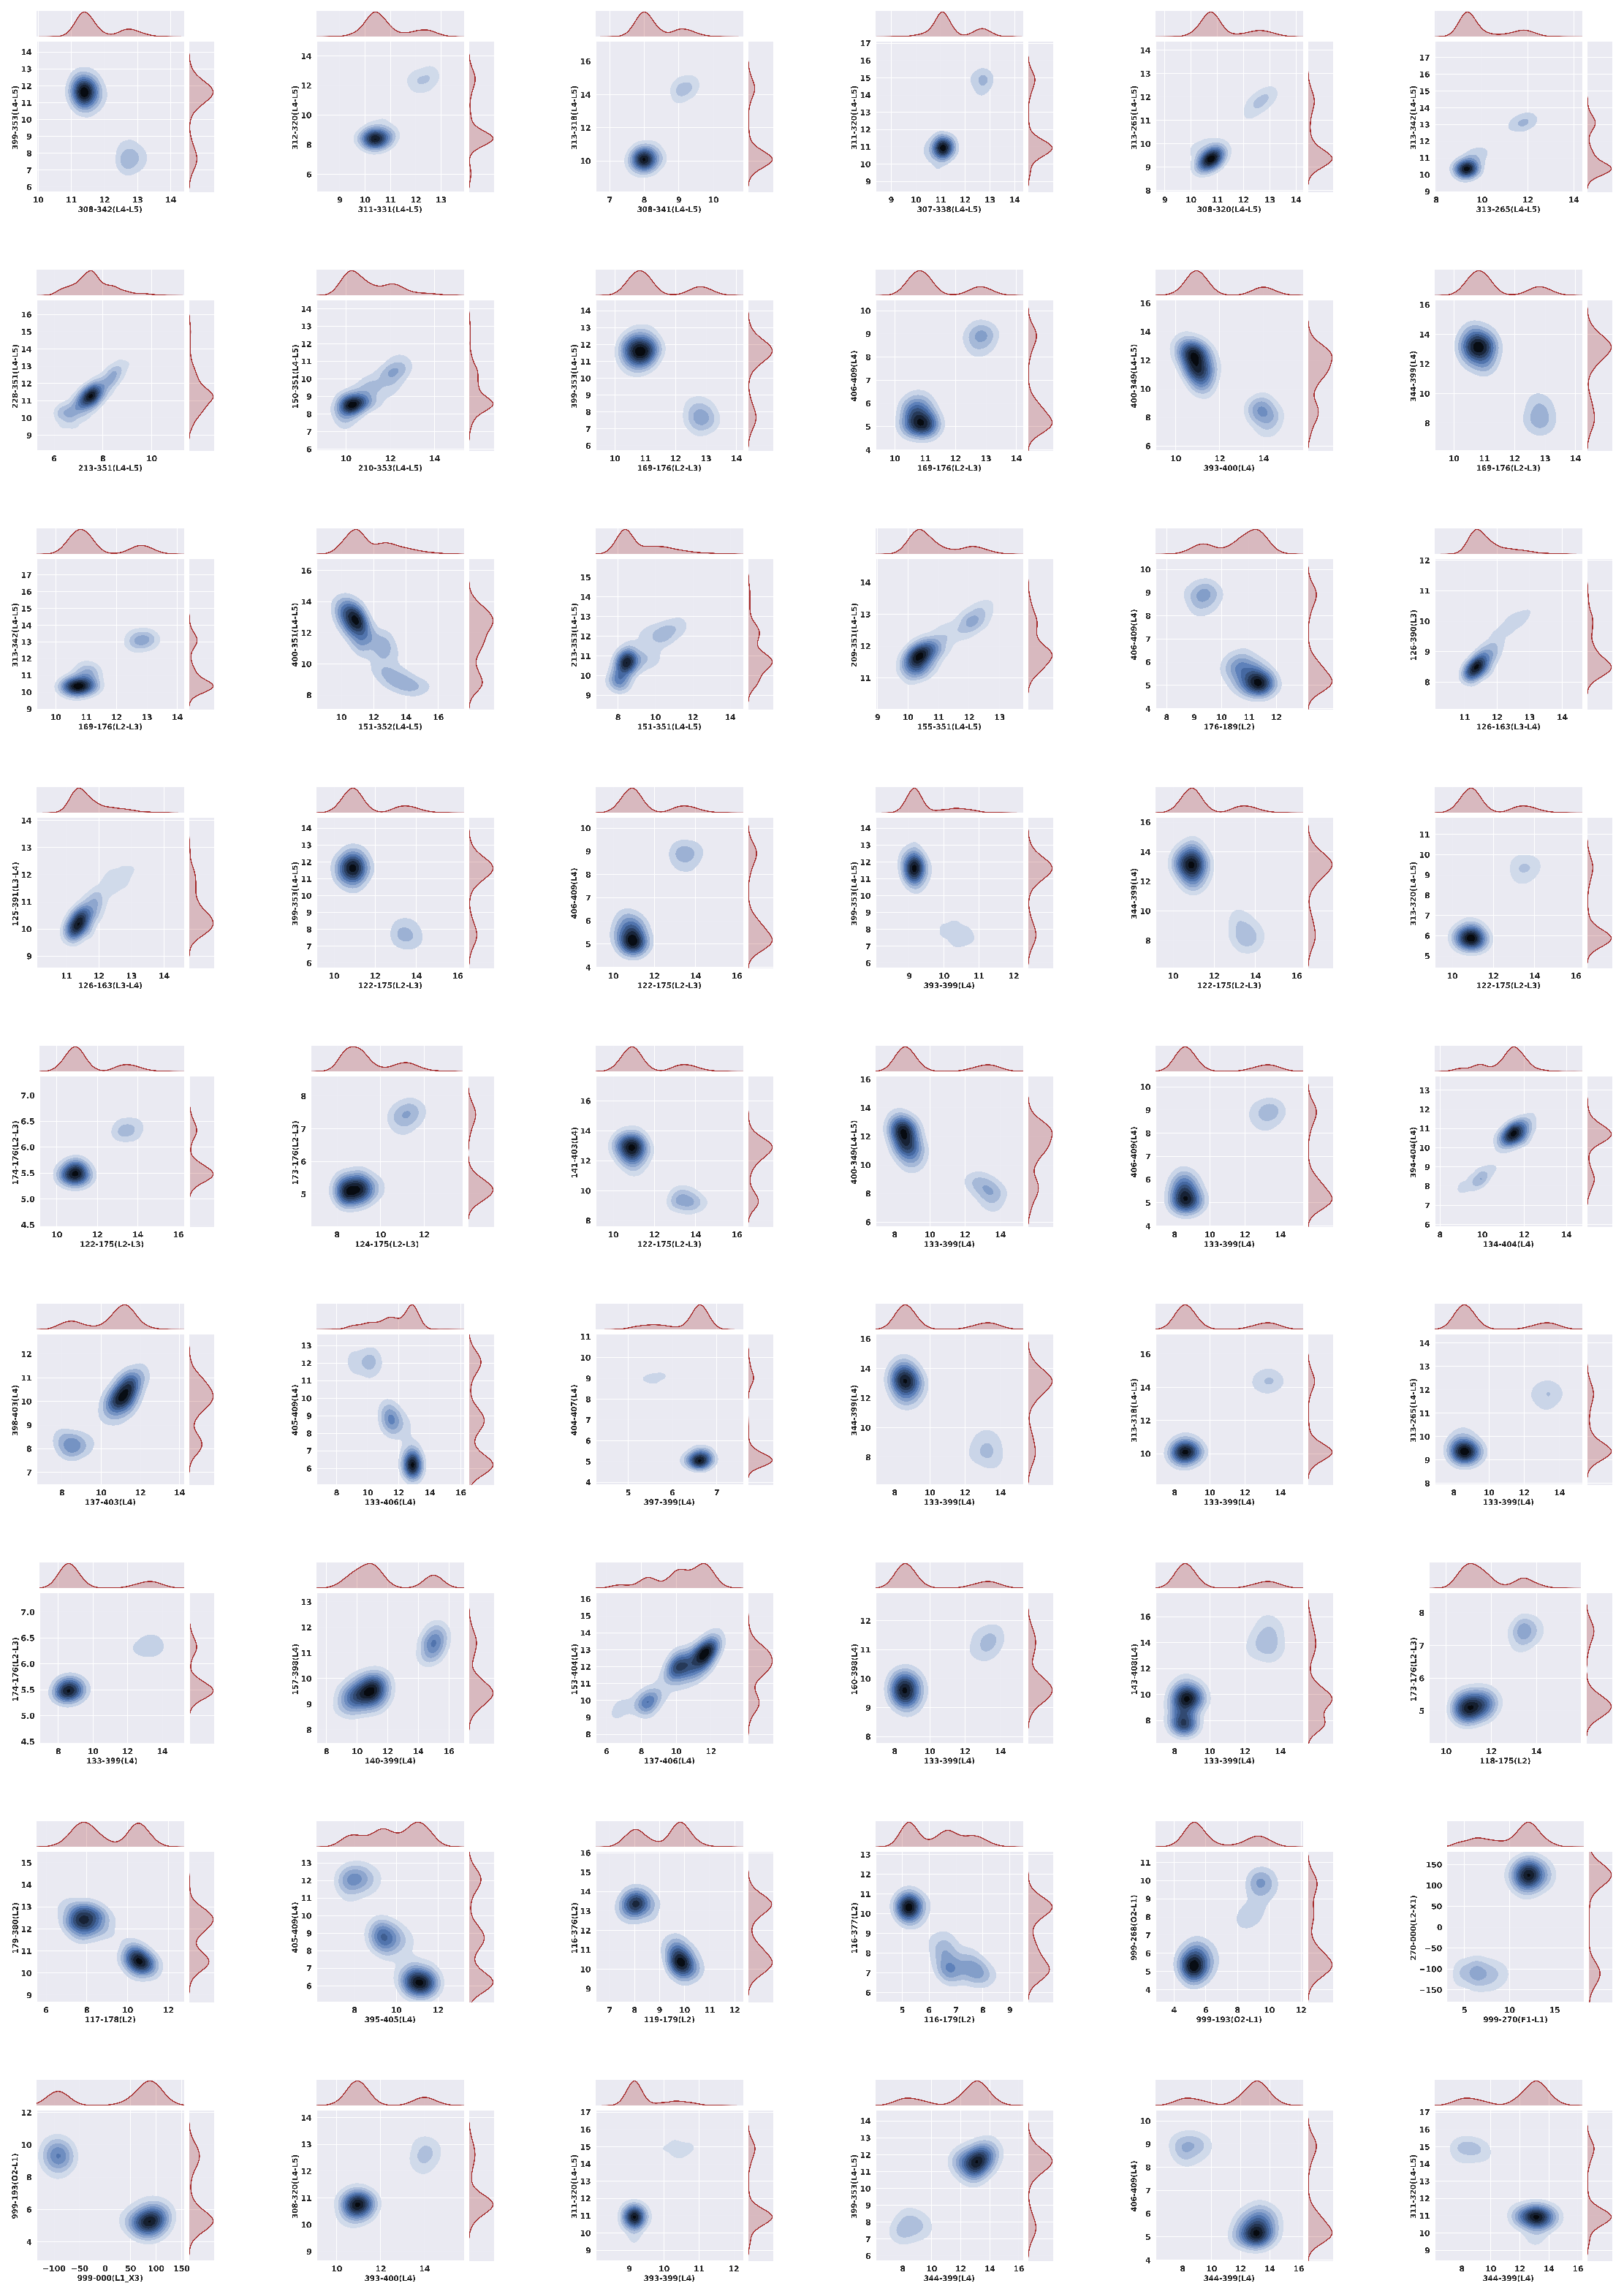

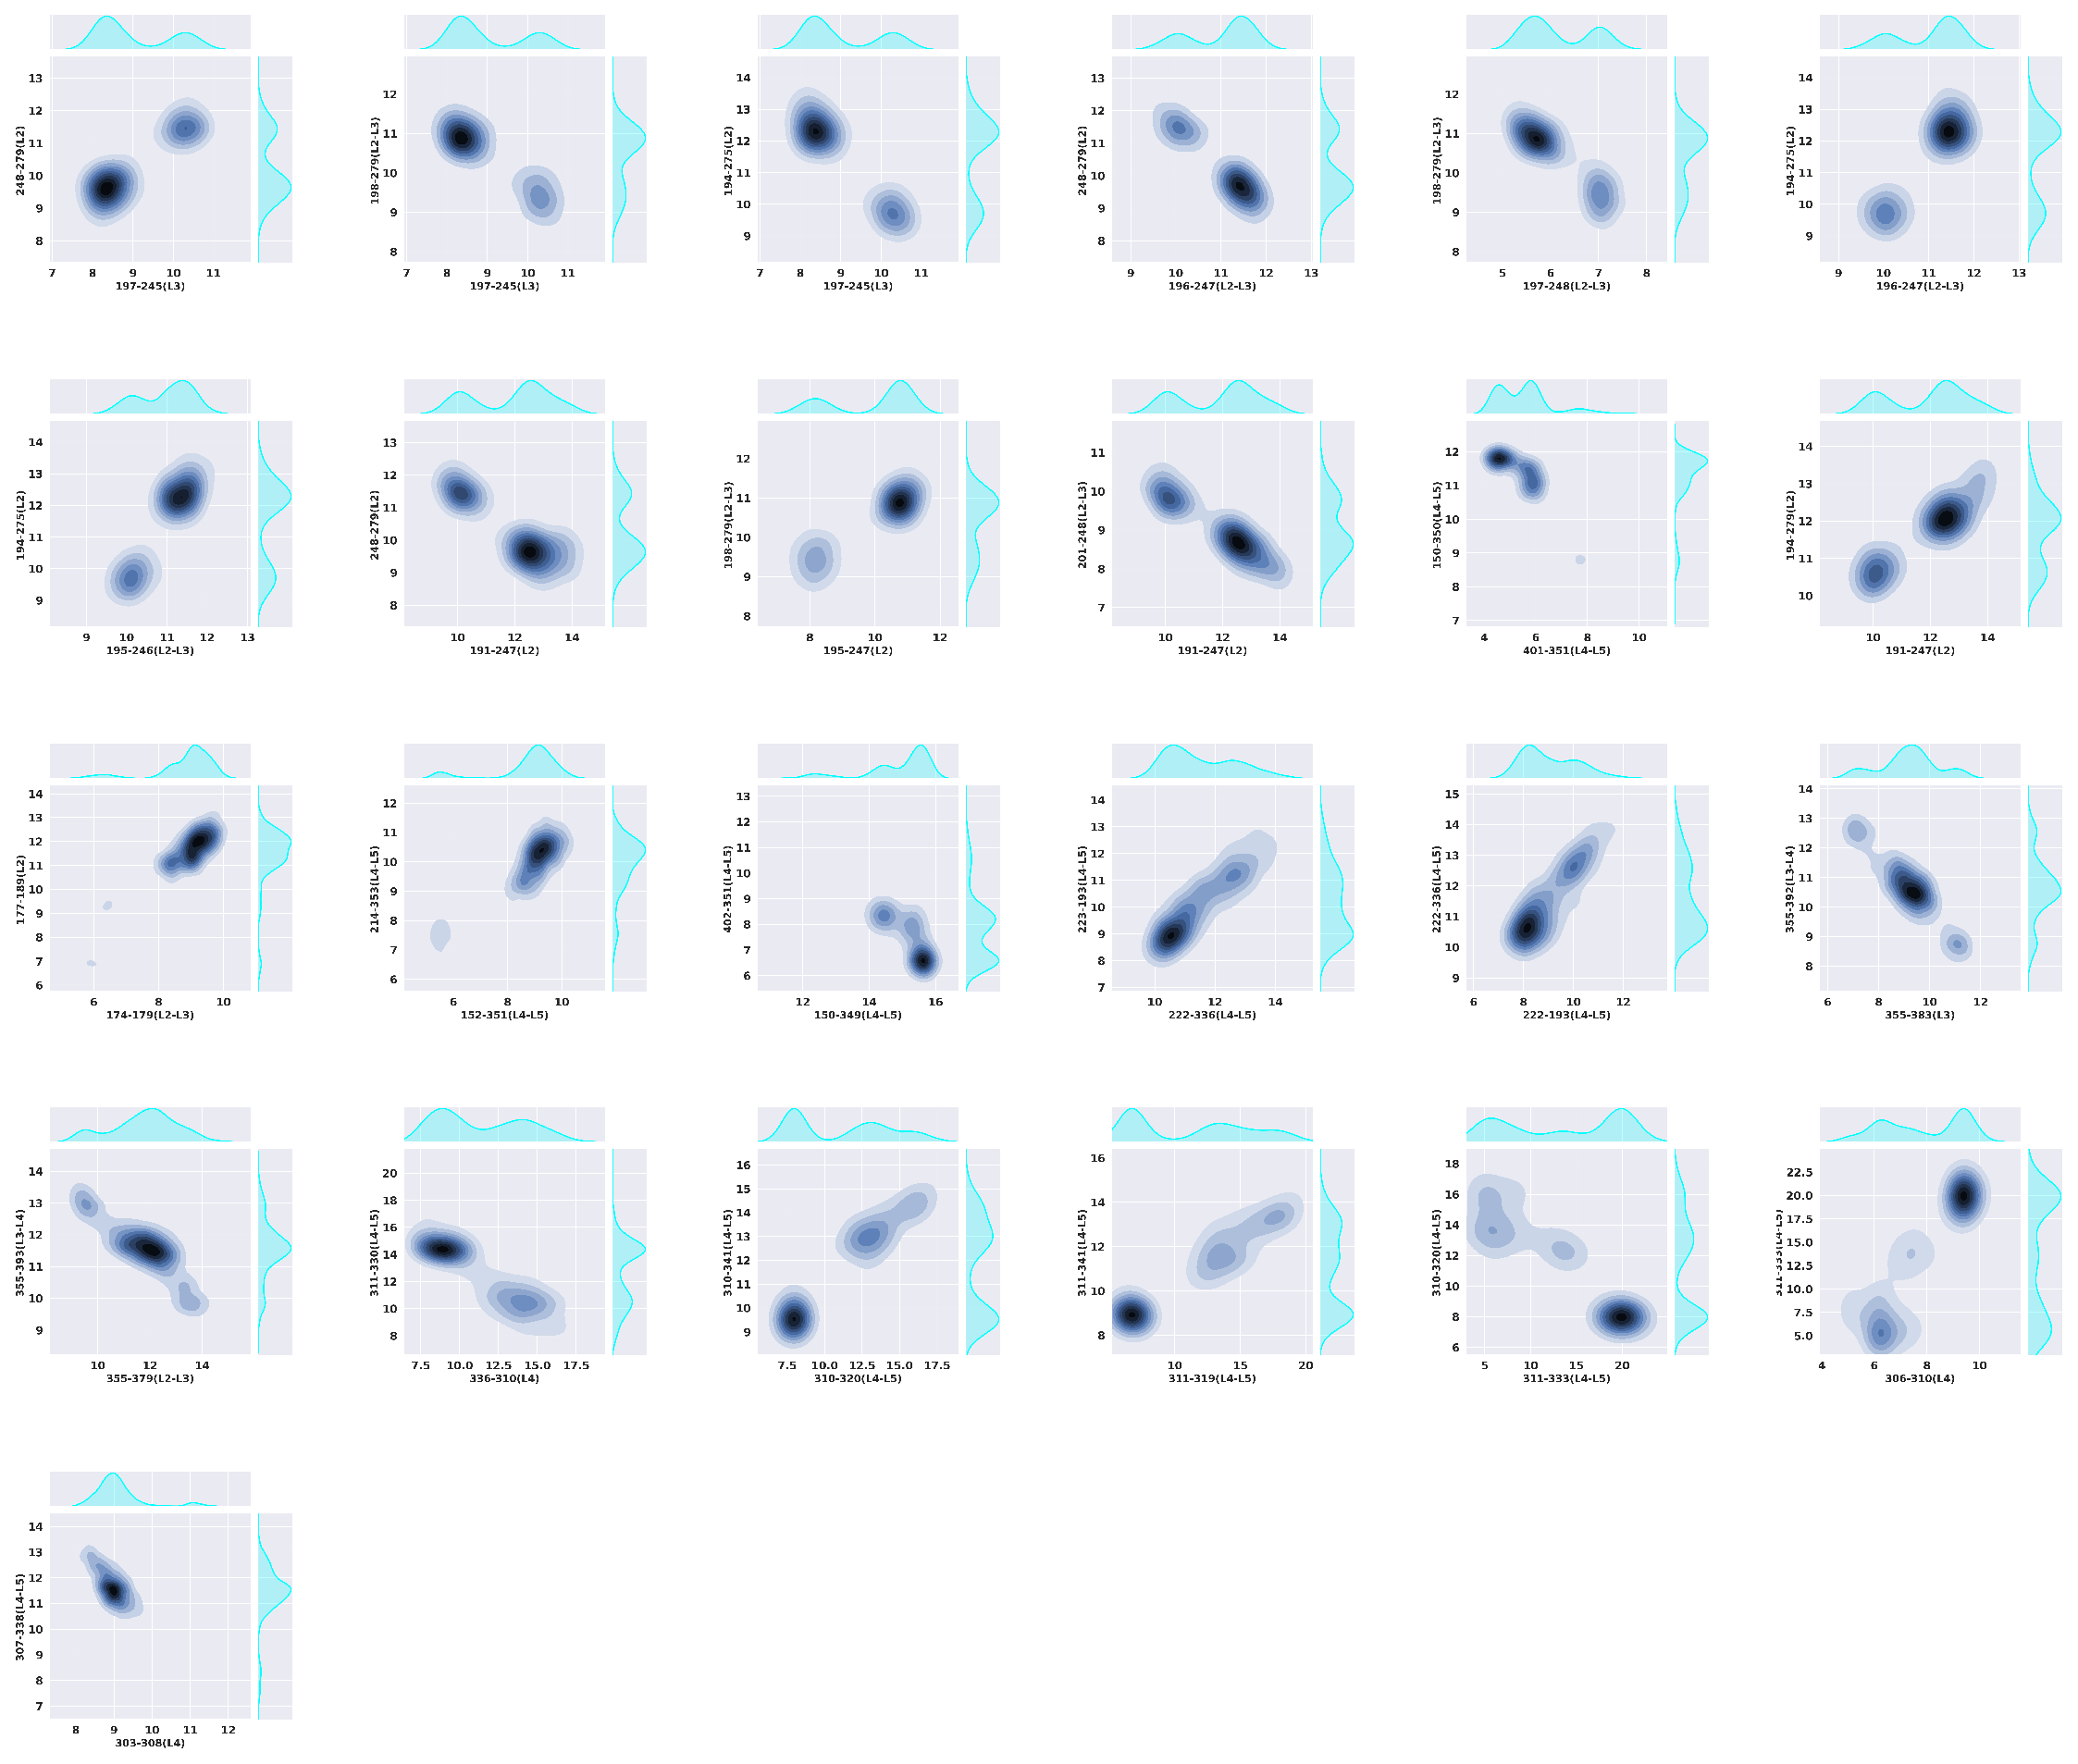

In [4]:
plotimages('only_mdmb')
print('-----------------------------------------')
plotimages('only_mmb')

In [112]:
def save_ga_rec_lig_indices(Lig_name, whichone, list_name):
    
    final_pairs = pd.read_csv(Lig_name +'_' + whichone + '_final_pairs.csv')
        
    final_pairs_index1 = final_pairs[['index_1']]
    final_pairs_index2 = final_pairs[['index_2']]
    print(final_pairs_index1)
    print(final_pairs_index2)
    print('------------------------------------------')
    
    if list_name == 'ga':
    
        final_pairs_index1['index_1'] = final_pairs_index1[(final_pairs_index1['index_1'].str.contains('L5')==True)]
        final_pairs_index1_filtered = (final_pairs_index1.dropna(subset=['index_1']))
        print(final_pairs_index1_filtered)

        final_pairs_index2['index_2'] = final_pairs_index2[(final_pairs_index2['index_2'].str.contains('L5')==True)]
        final_pairs_index2_filtered = (final_pairs_index2.dropna(subset=['index_2']))
        print(final_pairs_index2_filtered)
        
    elif list_name =='rec_lig':
        
        final_pairs_index1['index_1'] = final_pairs_index1[(final_pairs_index1['index_1'].str.contains('L5')==False)]
        final_pairs_index1_filtered = (final_pairs_index1.dropna(subset=['index_1']))
        print(final_pairs_index1_filtered)

        final_pairs_index2['index_2'] = final_pairs_index2[(final_pairs_index2['index_2'].str.contains('L5')==False)]
        final_pairs_index2_filtered = (final_pairs_index2.dropna(subset=['index_2']))
        print(final_pairs_index2_filtered)
    
    final_pairs_index1_filtered['index_1_no_layer'] = final_pairs_index1_filtered['index_1'].str.replace(r"\s*\([^()]*\)","").str.strip()
    final_pairs_index2_filtered['index_2_no_layer'] = final_pairs_index2_filtered['index_2'].str.replace(r"\s*\([^()]*\)","").str.strip()
    
    final_pairs_index1_filtered[['start_index_1', 'end_index_1']] = final_pairs_index1_filtered['index_1_no_layer'].apply(lambda val: pd.Series(map(int, val.split('-'))))
    final_pairs_index2_filtered[['start_index_2', 'end_index_2']] = final_pairs_index2_filtered['index_2_no_layer'].apply(lambda val: pd.Series(map(int, val.split('-'))))

    print(final_pairs_index1_filtered[['start_index_1', 'end_index_1']])
    print(final_pairs_index2_filtered[['start_index_2', 'end_index_2']])
    
    start_ = pd.concat([final_pairs_index1_filtered['start_index_1'], final_pairs_index2_filtered['start_index_2']], axis=0)
    print(start_)                                                                                                  
    end_ = pd.concat([final_pairs_index1_filtered['end_index_1'], final_pairs_index2_filtered['end_index_2']], axis=0)
    print(end_)    
    
    indices = pd.concat([start_, end_], axis=1)
    indices.to_csv(Lig_name + '_' + list_name + '_indices.csv', index=False, header=False)


In [113]:
save_ga_rec_lig_indices('mdmb','only','rec_lig')
save_ga_rec_lig_indices('mdmb','only','ga')
print('----------------------------------------')
save_ga_rec_lig_indices('mmb','only','rec_lig')
save_ga_rec_lig_indices('mmb','only','ga')


           index_1
0      393-400(L4)
1      393-399(L4)
2      397-399(L4)
3      395-405(L4)
4      393-400(L4)
5      393-399(L4)
6      344-399(L4)
7      344-399(L4)
8      344-399(L4)
9   308-342(L4-L5)
10  311-331(L4-L5)
11  308-341(L4-L5)
12  307-338(L4-L5)
13  308-320(L4-L5)
14  313-265(L4-L5)
15  213-351(L4-L5)
16  210-353(L4-L5)
17  169-176(L2-L3)
18  169-176(L2-L3)
19  169-176(L2-L3)
20  169-176(L2-L3)
21  151-352(L4-L5)
22  151-351(L4-L5)
23  155-351(L4-L5)
24     176-189(L2)
25  126-163(L3-L4)
26  126-163(L3-L4)
27  122-175(L2-L3)
28  122-175(L2-L3)
29  122-175(L2-L3)
30  122-175(L2-L3)
31  122-175(L2-L3)
32  124-175(L2-L3)
33  122-175(L2-L3)
34     133-399(L4)
35     133-399(L4)
36     134-404(L4)
37     137-403(L4)
38     133-406(L4)
39     133-399(L4)
40     133-399(L4)
41     133-399(L4)
42     133-399(L4)
43     140-399(L4)
44     137-406(L4)
45     133-399(L4)
46     133-399(L4)
47     118-175(L2)
48     117-178(L2)
49     119-179(L2)
50     116-179(L2)
51  999-193(

In [3]:
def write_list(list_save_as,list_name1, list_name2,list_name3):
    with open(list_save_as, 'w', newline='') as myfile:
         wr = csv.writer(myfile, quotechar="'",quoting=csv.QUOTE_ALL)
         wr.writerow(list_name1)
         wr.writerow(list_name2)
         wr.writerow(list_name3)
    myfile.close()

In [114]:
def ga_list_for_pymol(Lig_name, whichone):

    indices_start_end = pd.read_csv(Lig_name + '_' + 'ga_indices.csv', header = 0,  names = ['index_1_index_2_start', 'index_1_index_2_end'])
    print(len(indices_start_end['index_1_index_2_start']))
    print(len(indices_start_end['index_1_index_2_end']))
    
    
    ga_indices = indices_start_end
    ga_indices_start = ga_indices['index_1_index_2_start'].tolist()
    ga_indices_end = ga_indices['index_1_index_2_end'].tolist()
    
    if Lig_name=='mdmb':
        ga_radius_list=[0.5 for _ in range(len(ga_indices_start))]
    else:
        ga_radius_list=[-0.5 for _ in range(len(ga_indices_start))]

        print('Ga Indices')
    print(ga_indices_start)
    print(ga_indices_end)
    print(len(ga_indices_start))
    print('')
    write_list(Lig_name+'_'+whichone+'_ga_list.csv',ga_indices_start,ga_indices_end,ga_radius_list)

In [115]:
ga_list_for_pymol('mdmb','only')
print('-----------------------------------------------')
ga_list_for_pymol('mmb','only')

34
34
[311, 308, 307, 308, 313, 213, 210, 151, 151, 155, 400, 399, 308, 311, 399, 311, 399, 312, 313, 311, 313, 313, 228, 150, 399, 313, 400, 213, 209, 399, 313, 400, 313, 313]
[331, 341, 338, 320, 265, 351, 353, 352, 351, 351, 349, 353, 320, 320, 353, 320, 353, 320, 318, 320, 265, 342, 351, 351, 353, 342, 351, 353, 351, 353, 320, 349, 318, 265]
34

-----------------------------------------------
18
18
Ga Indices
[310, 311, 311, 152, 150, 222, 222, 150, 311, 310, 311, 310, 311, 307, 214, 402, 223, 222]
[320, 319, 333, 351, 349, 336, 193, 350, 330, 341, 341, 320, 333, 338, 353, 351, 193, 336]
18



In [222]:
def rec_lig_list_for_pymol(Lig_name, whichone):
    
    
    indices_start_end = pd.read_csv(Lig_name + '_' + 'rec_lig_indices.csv', header = 0,  names = ['index_1_index_2_start', 'index_1_index_2_end'])
    print(len(indices_start_end['index_1_index_2_start']))
    print(len(indices_start_end['index_1_index_2_end']))


    '''Filtering, '''

    ligand_indices = indices_start_end[(indices_start_end['index_1_index_2_start'] == 999) |
                                (indices_start_end['index_1_index_2_end'] == 999)]


    receptor_indices = indices_start_end.drop(indices_start_end[(indices_start_end['index_1_index_2_start'] == 999) 
                                                  | (indices_start_end['index_1_index_2_end'] == 999)].index)


    ligand_indices_start = ligand_indices['index_1_index_2_start'].tolist()
    ligand_indices_end = ligand_indices['index_1_index_2_end'].tolist()

    receptor_indices_start = receptor_indices['index_1_index_2_start'].tolist()
    receptor_indices_end = receptor_indices['index_1_index_2_end'].tolist()

    if Lig_name=='mdmb':
        ligand_radius_list=[0.2 for _ in range(len(ligand_indices_start))]
        receptor_radius_list=[0.5 for _ in range(len(receptor_indices_start))]
    else:
        ligand_radius_list=[-0.2 for _ in range(len(ligand_indices_start))]
        receptor_radius_list=[-0.5 for _ in range(len(receptor_indices_start))]
    
    print('Ligand Indices')    
    print(ligand_indices_start)
    print(ligand_indices_end)
    print(len(ligand_indices_start))
    print('')

    print('Receptor Indices')
    print(receptor_indices_start)
    print(receptor_indices_end)
    print(len(receptor_indices_start))
    print('')

    length = len(ligand_indices_start) + len(receptor_indices_start)
    print('corr pairs are:', int(length/2))
    print('corr distances are:', length)  
    
    write_list(Lig_name+'_'+ whichone +'_receptor_list.csv',receptor_indices_start,receptor_indices_end,receptor_radius_list)
    write_list(Lig_name+'_'+ whichone +'_ligand_list.csv',ligand_indices_end,ligand_indices_start,ligand_radius_list)

In [223]:
rec_lig_list_for_pymol('mdmb','only')
print('-------------------------------------------------------')
rec_lig_list_for_pymol('mmb','only')

72
72
Ligand Indices
[999, 999, 999, 999, 999]
[193, 270, 0, 268, 193]
5

Receptor Indices
[393, 397, 395, 393, 393, 344, 344, 344, 169, 169, 169, 169, 176, 126, 126, 122, 122, 122, 122, 122, 124, 122, 133, 133, 134, 137, 133, 133, 133, 133, 133, 140, 137, 133, 133, 118, 117, 119, 116, 404, 405, 406, 406, 344, 406, 126, 125, 406, 344, 174, 173, 141, 406, 394, 398, 405, 344, 174, 157, 153, 160, 143, 173, 179, 116, 116, 270]
[399, 399, 405, 400, 399, 399, 399, 399, 176, 176, 176, 176, 189, 163, 163, 175, 175, 175, 175, 175, 175, 175, 399, 399, 404, 403, 406, 399, 399, 399, 399, 399, 406, 399, 399, 175, 178, 179, 179, 407, 409, 409, 409, 399, 409, 390, 391, 409, 399, 176, 176, 403, 409, 404, 403, 409, 399, 176, 398, 404, 398, 408, 176, 380, 376, 377, 0]
67

corr pairs are: 36
corr distances are: 72
-------------------------------------------------------
30
30
Ligand Indices
[]
[]
0

Receptor Indices
[355, 336, 306, 303, 197, 197, 197, 196, 197, 196, 195, 191, 195, 191, 191, 174, 355, 355,

In [122]:
from pandas.io.common import EmptyDataError

def pymol_final_list(Lig_name,whichone,group):
    
    try:

        df = pd.read_csv(Lig_name +'_' + whichone + '_' + group + '_list.csv', header=None)
        for i, col in enumerate(df.columns):
            if Lig_name=='mdmb':
                
                df.iloc[2, i] = df.iloc[2, i].replace("'", '')
                df.index = ['receptor_list = ', 'galpha_list = ','radius_list = '] 
                df.to_csv(Lig_name +'_' + whichone + '_' + group  + '_list_for_merge.csv', header=False)
            else:
     
                df.iloc[2, i] = df.iloc[2, i].replace("'", '')
                df.to_csv(Lig_name +'_' + whichone + '_' + group  + '_list_for_merge.csv', index=False, header=False)
            
    except EmptyDataError:
        df = pd.DataFrame()

In [123]:
pymol_final_list('mdmb','only','receptor')
pymol_final_list('mdmb','only','ligand')
pymol_final_list('mdmb','only','ga')

pymol_final_list('mmb','only','receptor')
pymol_final_list('mmb','only','ligand')
pymol_final_list('mmb','only','ga')

In [209]:
def list_for_visualization(List_name1,List_name2, suffix):
    
    try:
        file1 = pd.read_csv(List_name1, header=None)
        file2 = pd.read_csv(List_name2, header=None)
        combined = pd.concat([file1, file2], axis=1)
        
        print(suffix + ' completed')
        print(combined)
        combined.to_csv('corr_pairs_' + suffix + '.py', index= False, header=False)
    except IOError:
           print(suffix + ' NOT completed') 
        print('file does not exist for concatenation')


In [210]:
list_for_visualization('mdmb_only_receptor_list_for_merge.csv','mmb_only_receptor_list_for_merge.csv','rr')
print('---------------------------------------------------------------------------------------------------')
list_for_visualization('mdmb_only_ga_list_for_merge.csv','mmb_only_ga_list_for_merge.csv','rg')
print('---------------------------------------------------------------------------------------------------')
list_for_visualization('mdmb_only_ligand_list_for_merge.csv','mmb_only_ligand_list_for_merge.csv','l')

rr completed
                 0      1      2      3      4      5      6      7      8   \
0  receptor_list =   '393'  '397'  '395'  '393'  '393'  '344'  '344'  '344'   
1    galpha_list =   '399'  '399'  '405'  '400'  '399'  '399'  '399'  '399'   
2    radius_list =     0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

      9      10     11     12     13     14     15     16     17     18  \
0  '169'  '169'  '169'  '169'  '176'  '126'  '126'  '122'  '122'  '122'   
1  '176'  '176'  '176'  '176'  '189'  '163'  '163'  '175'  '175'  '175'   
2    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

      19     20     21     22     23     24     25     26     27     28  \
0  '122'  '122'  '124'  '122'  '133'  '133'  '134'  '137'  '133'  '133'   
1  '175'  '175'  '175'  '175'  '399'  '399'  '404'  '403'  '406'  '399'   
2    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

      29     30     31     32     33     34     35     36     37    

### 2nd Step

In [211]:
def ligand_atoms_list(Lig_name, whichone):

    final_pairs = pd.read_csv(Lig_name +'_' + whichone + '_final_pairs.csv')
    
    ligand_atoms = final_pairs[
    (final_pairs['index_1'].str.contains('999')==True)|
    (final_pairs['index_2'].str.contains('999')==True)
    ]
    
    list1 = (ligand_atoms['index_1'].str[8:10]).values.tolist()
    list2 = (ligand_atoms['index_2'].str[8:10]).values.tolist()
    final_list = list1+list2
    
    print(final_list)
    
    save_ligand_tag = pd.DataFrame([final_list])
    save_ligand_tag.index=['ligand_tag = ']
    save_ligand_tag.to_csv(Lig_name + '_' + whichone +'_lig_tag.csv', header=None,quotechar="'",quoting=csv.QUOTE_ALL)

In [212]:
ligand_atoms_list('mdmb','only')
ligand_atoms_list('mmb','only')

['O2', 'F1', 'L1', 'O2', 'L2', 'O2']
[]


In [213]:
motif_list = ['213','214','215','200','355','356','357','358',
              '393','394','395','396','397','286','338']

def corr_includes_motif_residues(Lig_name, whichone):
    
    if whichone=='both':
        print('The following corr. pairs involve motif residues for: ', whichone)
    else:
        print('The following corr. pairs involve motif residues for: ',Lig_name + '_' + whichone)
        
    df = pd.read_csv(Lig_name +'_' + whichone + '_final_pairs.csv')
    df

    for lst in motif_list:
        
        motif_ = df[(df['index_1'].str.contains(lst)==True)  | (df['index_2'].str.contains(lst)==True)] 
        
        if not motif_.empty:
            
            motif_header = motif_[['index_1','index_2','TM_residue1_x','TM_residue2_x']]
        
            print('')
            print(motif_header)
            print('')

In [214]:
corr_includes_motif_residues('mdmb', 'only')
print('******************************************************************************')
corr_includes_motif_residues('mmb', 'only')

The following corr. pairs involve motif residues for:  mdmb_only

           index_1         index_2 TM_residue1_x TM_residue2_x
15  213-351(L4-L5)  228-351(L4-L5)       TM3i-ga     ICL2-ICL2
22  151-351(L4-L5)  213-353(L4-L5)       TM2i-ga       TM3i-ga


       index_1         index_2 TM_residue1_x TM_residue2_x
0  393-400(L4)  400-349(L4-L5)     TM7i-TM7i       TM7i-ga
1  393-399(L4)  399-353(L4-L5)     TM7i-TM7i       TM7i-ga
4  393-400(L4)  308-320(L4-L5)     TM7i-TM7i       TM5i-ga
5  393-399(L4)  311-320(L4-L5)     TM7i-TM7i       TM5i-ga


        index_1      index_2 TM_residue1_x TM_residue2_x
36  134-404(L4)  394-404(L4)     TM1i-TM7i     TM7i-TM7i


       index_1      index_2 TM_residue1_x TM_residue2_x
3  395-405(L4)  405-409(L4)     TM7i-TM7i     TM7i-TM7i


       index_1      index_2 TM_residue1_x TM_residue2_x
2  397-399(L4)  404-407(L4)     TM7i-TM7i     TM7i-TM7i


           index_1         index_2 TM_residue1_x TM_residue2_x
12  307-338(L4-L5)  311-320(L4-L5)     